泰坦尼克号生存项目分析及可视化

1.提出问题
在泰坦尼克号上幸存的人有什么特征？

2.理解数据

2.1 采集数据
从Kaggle泰坦尼克项目页面下载数据：https://www.kaggle.com/c/titanic

2.2 导入数据

In [1]:
#忽略警告提示
import warnings
warnings.filterwarnings('ignore')
#导入处理数据包
import numpy as np
import pandas as pd
#导入数据
#训练数据集
train=pd.read_csv("./train.csv")
#测试数据集
test=pd.read_csv("./test.csv")
#训练数据集有891条数据，后面需要从中拆分出测试数据集用于提交kaggle结果
print('训练数据集：',train.shape,'测试数据集：',test.shape)

训练数据集： (891, 12) 测试数据集： (418, 11)


In [2]:
rowNum_train=train.shape[0]
rowNum_test=test.shape[0]
print('kaggle训练数据集有多少行数据：',rowNum_train,
     ',kaggle测试数据集有多少行数据：',rowNum_test)

kaggle训练数据集有多少行数据： 891 ,kaggle测试数据集有多少行数据： 418


In [3]:
#合并数据集，方便同时对两个数据集进行清洗
full=train.append(test,ignore_index=True)
print('合并后的数据集：',full.shape)

合并后的数据集： (1309, 12)


查看数据集信息

查看数据


In [4]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


describe只能查看数据类型的描述统计信息，对于其他类型数据不显示，

比如字符串类型姓名（name），客舱好（cabin）

获取数据类型列的描述统计信息

In [5]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


查看每一列的数据类型、数据总数以及缺失率

数据总共有1309行（因为最大行数为1309）

其中有三列数据存在缺失情况:数据类型列年龄（Age）和船票价格(Fare)以及字符串列登船港口（Embarked）和船舱号(Cabin)

1）年龄（Age）缺失1309-1046=263条，缺失率为263/1309=20%

2)船票价格（Fare）缺失1309-1308=1条

3)登船港口（Embarked）缺失数据1309-1307=2条

4）船舱号(Cabin)缺失数据1309-295=1014条，缺失率=1014/1309=77.5%

In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


3:数据清洗

3.1数据预处理

缺失值处理

很多机器学习算法为了训练模型，要求所传入的特征中不能有空值，因此需要用尽可能准确的方法填补空值

1）数据类型：用平均值代替

2）分类数据：用众数代替

3）使用模型预测缺失值，如K-NN

In [7]:
#处理数据类型
print('处理前：')
full.info()
#年龄（Age）
full['Age']=full['Age'].fillna(full['Age'].mean())
#船票价格（Fare）
full['Fare']=full['Fare'].fillna(full['Fare'].mean())
print('处理后：')
full.info()

处理前：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
处理后：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64 

In [8]:
#检测数据处理是否正常
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


处理字符串类型

登船港口（Embarked）

出发地点：S=英国南安普顿Southampton

途径地点1：C=法国 瑟堡市Cherbourg

途径地点2：Q=爱尔兰 昆士敦Queenstown

In [9]:
full['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [10]:
#分类变量Embarked，查出众数，用其填充
#value_counts()用于查询数据某列的数据类别及相应类别的数量
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
full['Embarked']=full['Embarked'].fillna('S')
#船舱号（Cabin）
full['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [12]:
#因Cabin当中众数为缺失值，因此用表示缺失值的U来填充
full['Cabin']=full['Cabin'].fillna('U')
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


In [13]:
#查看最终缺失值处理情况，注意生存情况（survived）是标签，用来做机器学习预测，无需处理
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


3.2 特征提取

3.2.1 数据分类

查看数据类型，分为3种数据类型；其中对类别数据进行处理，用数值代替类别，并进行one-hot编码

1.数值类型：

乘客编号（PassengerId），年龄（Age），船票价格（Fare），同代直系亲属人数（SibSp），不同代直系亲属人数（Parch）

2.时间序列：无

3.分类数据：

1）有直接类别的

乘客性别（Sex）：男性male，女性female

登船港口（Embarked）：出发地点S=英国南安普顿Southampton，途径地点1：C=法国 瑟堡市Cherbourg，出发地点2：Q=爱尔兰 昆士敦Queenstown

客舱等级（Pclass）：1=1等舱，2=2等舱，3=3等舱

2）字符串类型：可能从这里面提取出特征来，也归到分类数据中

乘客姓名（Name）

客舱号（Cabin）

船票编号（Ticket）

In [14]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [15]:
#分类数据：有直接类别的
#性别
full['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [16]:
#将性别映射为数值，male-1,female-0
sex_mapDict={'male':1,'female':0}
#map函数：对Series每个数据应用自定义的函数计算
full['Sex']=full['Sex'].map(sex_mapDict)
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


In [17]:
#进行登船港口（Embarked）处理
#存放提取后的特征
embarkedDf=pd.DataFrame()
#使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables）,列名前缀是Embarked;序号和特征之间的矩阵对应
embarkedDf=pd.get_dummies(full['Embarked'],prefix='Embarked')
embarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [18]:
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
#pd.concat()为拼接函数
full=pd.concat([full,embarkedDf],axis=1)
#对Embarked变量进行了one-hot编码，因此可以将原变量删掉(inplace默认的是False)
full.drop('Embarked',axis=1,inplace=True)
full.head()
#使用drop删除列的语法：drop([列名1,列名2],axis=1);axis=1表示

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,0,0,1


In [19]:
#客舱等级（Pcalss）
#存放提取后的特征
pclassDf=pd.DataFrame()
#使用get_dummies进行one-hot编码，列名前缀是Pclass
pclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
pclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [20]:
full=pd.concat([full,pclassDf],axis=1)
full.drop('Pclass',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,0,0,1,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,0,0,1,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,0,0,1,0,0,1


3.2.1分类数据：字符串类型

字符串类型：可能从这里面提取出特征来，归到分类数据中-1）乘客姓名（Name）;2)客舱号（Cabin）;3)船票编号（Ticket）

从姓名中提取出头衔（姓名中包含头衔，可以提取出来作为更细的分类变量用于新的分析角度）

In [21]:
full['Name'].head()
#练习从字符串中提取头衔；split用于字符串分割，返回一个列表；姓名的格式为“名，头衔.姓”

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [22]:
#使用split按‘,’分,提取序号为1的
name1='Braund,Mr. Owen Harris'
str1=name1.split(',')[1]
print(str1)

Mr. Owen Harris


In [23]:
name1='Braund,Mr. Owen Harris'
str2=name1.split('.')[0]
str3=name1.split('.')
print(str3)
print(str2)
#strip()方法用于移除字符串头尾指定的字符（默认为空格）
str4=str2.strip()

['Braund,Mr', ' Owen Harris']
Braund,Mr


In [24]:
#定义函数：从姓名中获取头衔
def getTitle(Name):
    str1=Name.split(',')[1]
    str2=str1.split('.')[0]
    str3=str2.strip()
    return str3
#存放提取后的特征
titleDf=pd.DataFrame()
#map函数：对series每个数据应用自定义的函数计算
titleDf['Title']=full['Name'].map(getTitle)
titleDf.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


定义头衔的含义：

Officer政府官员

Royalty皇室

Mr男士/已婚男士

Mrs已婚女士

Miss已婚女士

Master有技能的人/硕士/教师

In [25]:
#姓名中头衔字符串与定义头衔类别的映射关系
title_mapDict={
    "Capt":"Officer",
    "Col":"Officer",
    "Major":"Officer",
    "Jonkheer":"Royalty",
    "Don":"Royalty",
    "Sir":"Officer",
    "Dr":"Master",
    "Rev":"Officer",
    "the Countess":"Royalty",
    "Dona":"Royalty",
    "Mme":"Mrs",
    "Mlle":"Miss",
    "Ms":"Mrs",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Lady":"Royalty"}
titleDf['Title']=titleDf['Title'].map(title_mapDict)
titleDf=pd.get_dummies(titleDf['Title'])
titleDf.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [26]:
full=pd.concat([full,titleDf],axis=1)
full.drop('Name',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,U,0,...,1,0,0,1,0,0,1,0,0,0
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,C85,1,...,0,1,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,U,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1.0,0,35.0,1,0,113803,53.1000,C123,0,...,1,1,0,0,0,0,0,1,0,0
4,5,0.0,1,35.0,0,0,373450,8.0500,U,0,...,1,0,0,1,0,0,1,0,0,0


In [27]:
#从客舱号提取客舱类别
'''
使用匿名函数：lambda
lambda 参数1，参数2：函数体或者表达式
'''
#定义匿名函数：对两个数相加
sum=lambda a,b:a+b
#调用sum函数
print("相加后的值为：",sum(10,20))

相加后的值为： 30


In [28]:
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [29]:
#存放客舱号信息
CabinDf=pd.DataFrame()
'''
客舱号的类别值是首字母，A89,类别映射为A
'''
full['Cabin']=full['Cabin'].map(lambda C : C[0])
CabinDf=pd.get_dummies(full['Cabin'],prefix='Cabin')
CabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [30]:
full.drop('Cabin',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,0,0,1,0,0,0
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0,1,0,0,0,0
3,4,1.0,0,35.0,1,0,113803,53.1000,0,0,1,1,0,0,0,0,0,1,0,0
4,5,0.0,1,35.0,0,0,373450,8.0500,0,0,1,0,0,1,0,0,1,0,0,0


In [31]:
#建立家庭人数和家庭类别
#存放家庭信息
familyDf=pd.DataFrame()
#一个家庭的人数=同代直系亲属数（Parch）+不同代直系亲属数（SibSp）+乘客自己
familyDf['FamilySize']=full['Parch']+full['SibSp']+1
'''
小家庭Family_Single:家庭人数=1
中等家庭Family_Small:2<=家庭人数<=4
大家庭Family_Large:家庭人数>5
'''
familyDf['Family_Single']=familyDf['FamilySize'].map(lambda s : 1 if s==1 else 0)
familyDf['Family_Small']=familyDf['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
familyDf['Family_Large']=familyDf['FamilySize'].map(lambda s : 1 if 5<=s else 0)
familyDf.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [32]:
full=pd.concat([full,familyDf],axis=1)
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Master,Miss,Mr,Mrs,Officer,Royalty,FamilySize,Family_Single,Family_Small,Family_Large
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,1,0,0,0,2,0,1,0
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,1,0,0,2,0,1,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,1,0,0,0,0,1,1,0,0
3,4,1.0,0,35.0,1,0,113803,53.1000,0,0,...,0,0,0,1,0,0,2,0,1,0
4,5,0.0,1,35.0,0,0,373450,8.0500,0,0,...,0,0,1,0,0,0,1,1,0,0


In [33]:
full.shape

(1309, 24)

3.3特征选择

相关系数法：计算各个特征之间的相关系数

相关性矩阵

In [34]:
corrDf=full.corr()
corrDf

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Master,Miss,Mr,Mrs,Officer,Royalty,FamilySize,Family_Single,Family_Small,Family_Large
PassengerId,1.000000,-0.005007,0.013406,0.025731,-0.055224,0.008942,0.031416,0.048101,0.011585,-0.049836,...,0.000009,-0.050027,0.014116,0.033299,0.005961,0.006620,-0.031437,0.028546,0.002975,-0.063415
Survived,-0.005007,1.000000,-0.543351,-0.070323,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,...,0.082177,0.332795,-0.549199,0.344935,-0.032156,0.016040,0.016639,-0.203367,0.279855,-0.125147
Sex,0.013406,-0.543351,1.000000,0.057397,-0.109609,-0.213125,-0.185484,-0.066564,-0.088651,0.115193,...,0.168245,-0.672819,0.870678,-0.571176,0.082707,-0.031555,-0.188583,0.284537,-0.255196,-0.077748
Age,0.025731,-0.070323,0.057397,1.000000,-0.190747,-0.130872,0.171521,0.076179,-0.012718,-0.059153,...,-0.317838,-0.254146,0.165476,0.198091,0.153268,0.046731,-0.196996,0.116675,-0.038189,-0.161210
SibSp,-0.055224,-0.035322,-0.109609,-0.190747,1.000000,0.373587,0.160224,-0.048396,-0.048678,0.073709,...,0.313811,0.077564,-0.243104,0.061643,-0.019909,-0.017772,0.861952,-0.591077,0.253590,0.699681
Parch,0.008942,0.081629,-0.213125,-0.130872,0.373587,1.000000,0.221522,-0.008635,-0.100943,0.071881,...,0.230883,0.066473,-0.304780,0.213491,-0.025395,-0.027555,0.792296,-0.549022,0.248532,0.624627
Fare,0.031416,0.257307,-0.185484,0.171521,0.160224,0.221522,1.000000,0.286241,-0.130054,-0.169894,...,0.021493,0.092051,-0.192192,0.139235,0.016024,0.023046,0.226465,-0.274826,0.197281,0.170853
Embarked_C,0.048101,0.168240,-0.066564,0.076179,-0.048396,-0.008635,0.286241,1.000000,-0.164166,-0.778262,...,-0.010411,-0.014351,-0.065538,0.098379,0.012024,0.060256,-0.036553,-0.107874,0.159594,-0.092825
Embarked_Q,0.011585,0.003650,-0.088651,-0.012718,-0.048678,-0.100943,-0.130054,-0.164166,1.000000,-0.491656,...,-0.005666,0.198804,-0.080224,-0.100374,-0.011996,-0.019941,-0.087190,0.127214,-0.122491,-0.018423
Embarked_S,-0.049836,-0.149683,0.115193,-0.059153,0.073709,0.071881,-0.169894,-0.778262,-0.491656,1.000000,...,0.012798,-0.113886,0.108924,-0.022950,-0.002978,-0.040498,0.087771,0.014246,-0.062909,0.093671


In [35]:
#查看各个特征与生存状况（survived）的相关系数，ascending=False表示按降序排列
corrDf['Survived'].sort_values(ascending=False)

Survived         1.000000
Mrs              0.344935
Miss             0.332795
Pclass_1         0.285904
Family_Small     0.279855
Fare             0.257307
Embarked_C       0.168240
Pclass_2         0.093349
Master           0.082177
Parch            0.081629
FamilySize       0.016639
Royalty          0.016040
Embarked_Q       0.003650
PassengerId     -0.005007
Officer         -0.032156
SibSp           -0.035322
Age             -0.070323
Family_Large    -0.125147
Embarked_S      -0.149683
Family_Single   -0.203367
Pclass_3        -0.322308
Sex             -0.543351
Mr              -0.549199
Name: Survived, dtype: float64

In [36]:
#特征选择
full_x=pd.concat(
[
    titleDf,#头衔
    pclassDf,#客舱等级
    familyDf,#家庭大小
    full['Fare'],#船票价格
    CabinDf,#船舱号
    embarkedDf,#登船港口
    full['Sex']#性别
],axis=1)
full_x.head()

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,FamilySize,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,1


4 构建模型

使用训练数据和某个机器学习算法得到机器学习模型，用测试数据评估模型

4.1 建立训练数据集和测试数据集

In [37]:
'''
1）泰坦尼克号测试数据里面没有生存情况的值，不能用于评估模型
2)我们使用训练数据集作为原始数据集，从中拆分出训练数据集和测试数据集
'''
#原始数据集有891行
sourceRow=891
#从特征集合full_x中提取原始数据集提取前891行数据时，我们要减去1，因为行号从0开始
#原始数据集：特征
source_X=full_x.loc[0:sourceRow-1,:]
#原始数据集：标签
source_Y=full.loc[0:sourceRow-1,'Survived']
#预测数据集
pred_X=full_x.loc[sourceRow:,:]
print('原始数据集有多少行:',source_X.shape[0])
print('预测数据集有多少行:',pred_X.shape[0])

原始数据集有多少行: 891
预测数据集有多少行: 418


In [41]:
'''
train_test_solit是交叉验证中常用的函数，功能是从样本中随机的按比例选取train data和test data
train_data:所要划分的样本特征集
train_target:所要划分的样本结果
test_size:样本占比，如果是整数的话就是样本的数量
'''
from sklearn.model_selection import train_test_split
#建立模型用的训练数据集和测试数据集
train_X,test_X,train_Y,test_Y=train_test_split(source_X,source_Y,train_size=0.8)
#输出数据集大小
print(
'原始数据集特征：',source_X.shape,
    '训练数据集特征',train_X.shape,
    '测试数据集特征',test_X.shape
)
print(
'原始数据集特征：',source_Y.shape,
    '训练数据集特征',train_Y.shape,
    '测试数据集特征',test_Y.shape
)

原始数据集特征： (891, 27) 训练数据集特征 (712, 27) 测试数据集特征 (179, 27)
原始数据集特征： (891,) 训练数据集特征 (712,) 测试数据集特征 (179,)


In [42]:
source_Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

选择机器学习算法

逻辑回归

In [44]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

4.3 训练模型


In [47]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

5评估模型

分类问题,score得到的是模型的正确率

In [49]:
model.score(test_X,test_Y)

0.8324022346368715

方案实施

6.1 使用预测数据集得到预测结果，保存在csv中，得到预测结果上传到Kaggle

使用机器学习模型，对预测数据集的生存状况进行预测，生成的预测值是浮点数，提交的是整数，需要进行数据类型转换

In [51]:
pred_Y=model.predict(pred_X)
pred_Y=pred_Y.astype(int)
#乘客ID
passenger_id=full.loc[sourceRow:,'PassengerId']
#数据框：乘客id，预测生存状况的值
predDf=pd.DataFrame(
{
    'PassengerId' : passenger_id,
    'Survived' : pred_Y
}
)
predDf.shape
predDf.head()
predDf.to_csv('titanic_pred.csv',index=False)

泰坦尼克号生存影响因素可视化：

由于救生艇有限，因此一个人得救概率取决于个人身份以及能力

根据历史知识以及常识推测以下几种影响因素

1）性别

2）领域专家身份，皇室身份

3）家庭人数

4）婚姻状况

5）所在客舱等级

<Figure size 288x216 with 0 Axes>

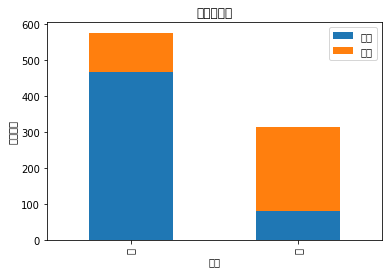

In [52]:
#幸存概率与性别
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,3))
data=full.loc[0:sourceRow-1,:]
Sur_m=data.loc[data['Sex']==1,'Survived'].value_counts()
Sur_f=data.loc[data['Sex']==0,'Survived'].value_counts()
SexDf=pd.DataFrame({'男':Sur_m,'女':Sur_f})
SexDf.T.plot(kind='bar',stacked=True)
plt.title('生存与性别')
plt.xlabel('性别')
plt.ylabel('生存数量')
plt.legend(labels=['死亡','幸存'])
plt.show()

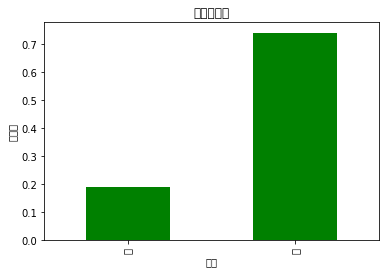

In [53]:
for i in SexDf.columns:
    SexDf.loc['幸存率',i]=SexDf.loc[1,i]/SexDf[i].sum()
SexDf.loc['幸存率'].plot(kind='bar',stacked=True,color='g')
plt.title('生存与性别')
plt.xlabel('性别')
plt.ylabel('幸存率')
plt.show()

<Figure size 1080x864 with 0 Axes>

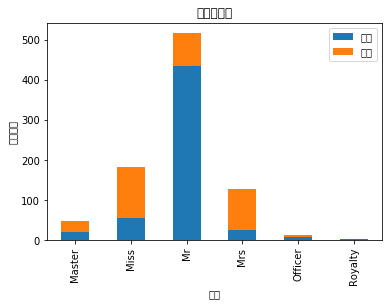

In [54]:
#幸存概率与身份
Sur_Master=data.loc[data['Master']==1,'Survived'].value_counts()
Sur_Miss=data.loc[data['Miss']==1,'Survived'].value_counts()
Sur_Mr=data.loc[data['Mr']==1,'Survived'].value_counts()
Sur_Mrs=data.loc[data['Mrs']==1,'Survived'].value_counts()
Sur_Officer=data.loc[data['Officer']==1,'Survived'].value_counts()
Sur_Royalty=data.loc[data['Royalty']==1,'Survived'].value_counts()
plt.figure(figsize=(15,12))
TitleDf=pd.DataFrame({'Master':Sur_Master,'Miss':Sur_Miss,'Mr':Sur_Mr,
                    'Mrs':Sur_Mrs,'Officer':Sur_Officer,'Royalty':Sur_Royalty})
TitleDf.T.plot(kind='bar',stacked=True)
plt.title('生存与身份')
plt.xlabel('身份')
plt.ylabel('生存数量')
plt.legend(labels=['死亡','幸存'])
plt.show()

In [55]:
for i in TitleDf.columns:
    TitleDf.loc['Survived Rate',i]=TitleDf.loc[1,i]/TitleDf[i].sum()
TitleDf

,Master,Miss,Mr,Mrs,Officer,Royalty
0.0,21.000000,55.000000,436.000000,26.000000,9.00,2.0
1.0,26.000000,129.000000,81.000000,101.000000,3.00,2.0
Survived Rate,0.553191,0.701087,0.156673,0.795276,0.25,0.5


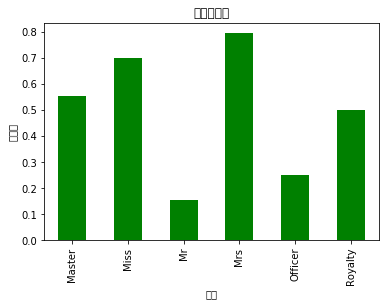

In [56]:
TitleDf.loc['Survived Rate'].plot(kind='bar',stacked=True,color='g')
plt.title('生存与身份')
plt.xlabel('身份')
plt.ylabel('幸存率')
plt.show()

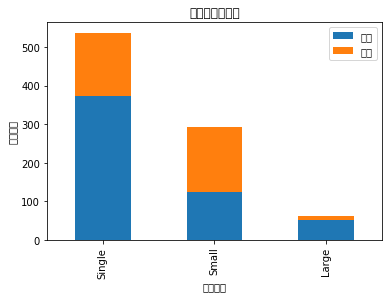

In [57]:
#幸存概率与家庭人数
FamSin=data.loc[data['Family_Single']==1,'Survived'].value_counts()
FamSma=data.loc[data['Family_Small']==1,'Survived'].value_counts()
FamLar=data.loc[data['Family_Large']==1,'Survived'].value_counts()
famdf=pd.DataFrame({'Single':FamSin,'Small':FamSma,'Large':FamLar})
famdf.T.plot(kind='bar',stacked=True)
plt.title('生存与家庭人数')
plt.xlabel('家庭大小')
plt.ylabel('生存数量')
plt.legend(labels=['死亡','幸存'])
plt.show()

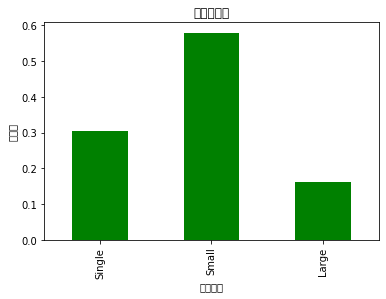

In [58]:
for i in famdf.columns:
    famdf.loc['Survived Rate',i]=famdf.loc[1,i]/famdf[i].sum()
famdf.loc['Survived Rate'].plot(kind='bar',stacked=True,color='g')
plt.title('生存与家庭')
plt.xlabel('家庭大小')
plt.ylabel('幸存率')
plt.show()

<Figure size 288x216 with 0 Axes>

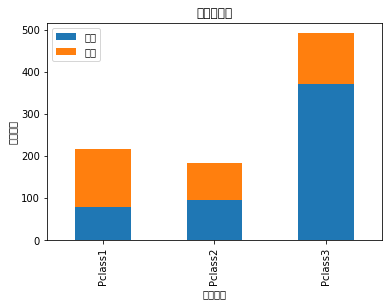

In [59]:
#幸存率与所在客舱等级
P1Sur=data.loc[data['Pclass_1']==1,'Survived'].value_counts()
P2Sur=data.loc[data['Pclass_2']==1,'Survived'].value_counts()
P3Sur=data.loc[data['Pclass_3']==1,'Survived'].value_counts()
plt.figure(figsize=(4,3))
PclassDf=pd.DataFrame({'Pclass1':P1Sur,'Pclass2':P2Sur,'Pclass3':P3Sur})
PclassDf.T.plot(kind='bar',stacked='True')
plt.title('生存与等级')
plt.xlabel('船舱等级')
plt.ylabel('生存数量')
plt.legend(labels=['死亡','幸存'])
plt.show()

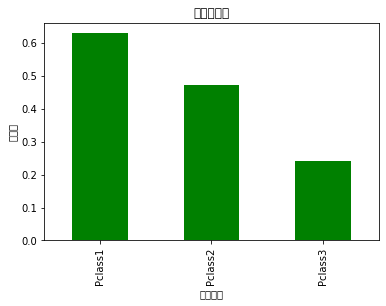

In [60]:
for i in PclassDf.columns:
    PclassDf.loc['Survived Rate',i]=PclassDf.loc[1,i]/PclassDf[i].sum()
PclassDf.loc['Survived Rate'].plot(kind='bar',stacked=True,color='g')
plt.title('生存与等级')
plt.xlabel('船舱等级')
plt.ylabel('幸存率')
plt.show()